<a href="https://colab.research.google.com/github/Igorvl/Projects/blob/master/%D0%98%D0%BD%D1%82%D0%B5%D0%B3%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8_%D0%BD%D0%B0_%D0%94%D0%95%D0%9C%D0%9E_%D0%9F%D0%90%D0%9D%D0%95%D0%9B%D0%AC_%7C_Lite_%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Необходимо создать, обучить нейронную сеть и упаковать её в архив для загрузки на демо-панель:
* создать нейронную сеть для распознавания цифр из MNIST
* сохраните веса (модель)
* подготовить запуск модели "из коробки"
* подготовить архив с готовой нейронной сетью для загрузки в демо-панель


In [1]:
# Загружаем базу mnist
from tensorflow.keras.datasets import mnist 

# Сеть прямого распространения
from tensorflow.keras.models import Sequential 

# Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta 

# Используем дял to_categoricall
from tensorflow.keras import utils 

# Для отрисовки изображений
from tensorflow.keras.preprocessing import image 

# Для загрузки своей картинки
from google.colab import files 

# Библиотека работы с массивами
import numpy as np 

# Для отрисовки графиков
import matplotlib.pyplot as plt 

# Для отрисовки изображений
from PIL import Image 

# Для генерации случайных чисел 
import random 

# Для округления
import math 

#Для работы с файлами 
import os 

# подключем диск
from google.colab import drive

%matplotlib inline

In [2]:
import gdown

gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l6/0-9.zip', None, quiet=True)

'0-9.zip'

## Распознавание изображений из набора данных MNIST 


**Подготовка данных**


In [3]:
# Загружаем MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

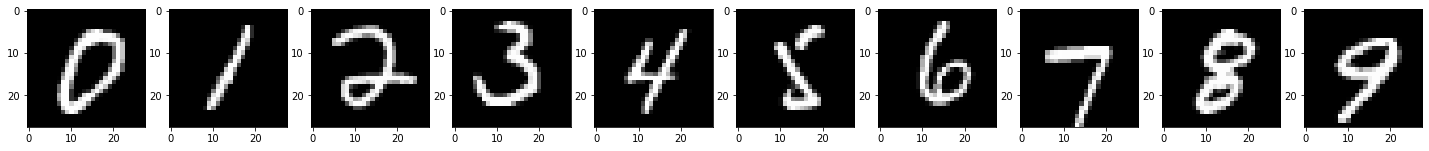

In [5]:
# Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) # Создаем полотно из 10 графиков

for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray') #Отображаем изображение i-ым графиков

plt.show() # Показываем изображения

In [6]:
# Превращаем y_train и y_test сетей в формат one hot encoding

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# Меняем формат данных MNIST
# Надо добавить в конце размерность 1
# Чтобы свёрточная сеть понимала, что это чёрно-белые данные

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [7]:
# Посмотрим форматы выборок перед обучением

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


**Нейронная сеть**

In [8]:
# задаём batch_size
batch_size = 128 

# Создаем последовательную модель

model = Sequential()

model.add(BatchNormalization(input_shape=(28, 28, 1))) # Слой пакетной нормализации
model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) # Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) # Второй сверточный слой
model.add(MaxPooling2D(pool_size=(2, 2))) # Первый слой подвыборки

model.add(Dropout(0.25)) # Слой регуляризации Dropout
model.add(Flatten())

model.add(Dense(256, activation='relu')) # Полносвязный слой для классификации
model.add(Dropout(0.25)) # Слой регуляризации Dropout
model.add(Dense(10, activation='softmax')) # Выходной полносвязный слой

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0

Epoch 1/15
469/469 [==============================] - 156s 330ms/step - loss: 0.1589 - accuracy: 0.9511 - val_loss: 0.0507 - val_accuracy: 0.9824
Epoch 2/15
469/469 [==============================] - 154s 328ms/step - loss: 0.0528 - accuracy: 0.9841 - val_loss: 0.0355 - val_accuracy: 0.9877
Epoch 3/15
469/469 [==============================] - 154s 329ms/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.0335 - val_accuracy: 0.9891
Epoch 4/15
469/469 [==============================] - 154s 328ms/step - loss: 0.0279 - accuracy: 0.9909 - val_loss: 0.0355 - val_accuracy: 0.9877
Epoch 5/15
469/469 [==============================] - 154s 328ms/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0341 - val_accuracy: 0.9898
Epoch 6/15
469/469 [==============================] - 154s 328ms/step - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.0289 - val_accuracy: 0.9918
Epoch 7/15
469/469 [==============================] - 153s 327ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.0335 -

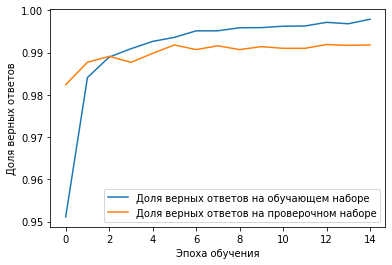

In [109]:
# Обучаем сеть на данных mnist

history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Отображаем график точности обучения

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [110]:
model.save('/content/drive/MyDrive/Neural_UN_Work/model.h5') 
model.save_weights('/content/drive/MyDrive/Neural_UN_Work/weights.h5') 

In [11]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Neural_UN_Work/model.h5')
print('Модель и веса загружены!')

model.summary()

# загрузка данных
from tensorflow.keras.datasets import mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Модель и веса загружены!
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (N

In [12]:
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l6/0-9.zip', None, quiet=True)

!unzip -qo 0-9.zip

In [13]:
from PIL import Image
img = Image.open('/content/0-9/7.jpg')
display(img)

In [14]:
# скрипт загрузки на Demo
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

def predict(img_path='/content/0-9/9.jpg', model_path='/content/drive/MyDrive/Neural_UN_Work/model.h5'):
    
    model = load_model(model_path)

    img_width, img_height = 28, 28

    img = Image.open(img_path).convert('L').resize((img_height, img_width))
    img = 255-np.array(img)

    plt.imshow(img, cmap='gray')
    plt.show()

    image = img.reshape(28,28,1)
    image = np.expand_dims(image, axis=0)

    cls_image = np.argmax(model.predict(image))
    print(model.predict(image))

    print(cls_image)

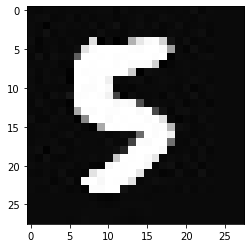

1/1 [==============================] - 0s 18ms/step
[[7.8105954e-22 3.0667158e-19 8.3112487e-17 3.5483325e-11 2.8047940e-15
  1.0000000e+00 4.2830792e-18 4.9800010e-16 7.0995642e-15 1.3804576e-10]]
5


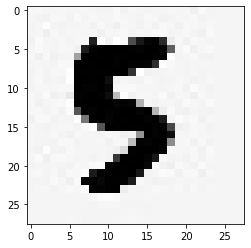

In [15]:
predict(img_path='/content/0-9/5.jpg', model_path='/content/drive/MyDrive/Neural_UN_Work/model.h5')
plt.imshow(Image.open('/content/0-9/5.jpg'))
plt.show()



In [21]:
from shutil import copyfile
import os
from zipfile import ZipFile as zip

text_code = """ 
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

def predict(img_path='/content/0-9/9.jpg', model_path='/content/drive/MyDrive/Neural_UN_Work/model.h5'):
    
    model = load_model(model_path)

    img_width, img_height = 28, 28

    img = Image.open(img_path).convert('L').resize((img_height, img_width))
    img = 255-np.array(img)

    plt.imshow(img, cmap='gray')
    plt.show()

    image = img.reshape(28,28,1)
    image = np.expand_dims(image, axis=0)

    cls_image = np.argmax(model.predict(image))
 """

with open('script.py', 'w') as f: 
    f.write(text_code)

for i in range(10):
  copyfile(f'/content/0-9/{i}.jpg', f'/content/{i}.jpg')

label_text = """ 
1
2
3
4
5
6
7
8
9
0
"""

with open('label.txt', 'w') as f: 
    f.write(label_text)

copyfile('/content/drive/MyDrive/Neural_UN_Work/model.h5', 'model.h5')

filesForDemo = ['model.h5','label.txt','script.py',*[f'{x}.jpg' for x in range(10)]]

zipForDemo = zip('/content/zipForDemo.zip','w')
for f in filesForDemo:
  if os.path.exists(f):
    zipForDemo.write(f)
    # print(f'{f} записан')
  else:
    print(f'файл {f} не существует')
zipForDemo.close()


In [22]:
from google.colab import files
files.download('/content/zipForDemo.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>